In [1]:
using CUDA, Flux
CUDA.device!(2)
Threads.nthreads()

16

In [33]:
include("utils/train.jl")

In [66]:
rbm, J, m, hparams, rbmZ = initModel(nv=28*28, nh=500, batch_size=500, lr=1.5, t=10, gpu_usage = true, optType="Adam")
opt = initOptW(hparams, J);

In [16]:
# modelName = "Eigen-500-T1426"
modelName = "CD-500-T1000"
rbm, J, m, hparams, opt = loadModel(modelName, gpu, idx=-1);
x, y = loadData(; hparams, dsName="MNIST01", numbers=collect(0:9), testset=true);
TS = Test(x,y)
dict = loadDict(modelName);

[ Info: /home/javier/Projects/RBM/Results/models/CD-500-T1000
[ Info: Loadding model J_1000.
[ Info: 10000


In [4]:
dev = gpu

gpu (generic function with 4 methods)

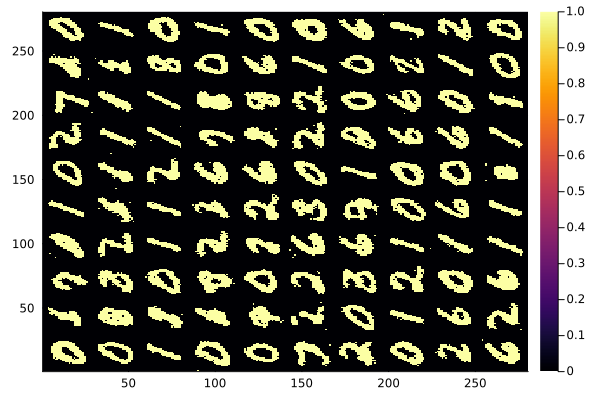

In [26]:
genSample(rbm, J, hparams, m; num = 100, t = 500, β = 1, mode = "test", dict=0, dev, TS)

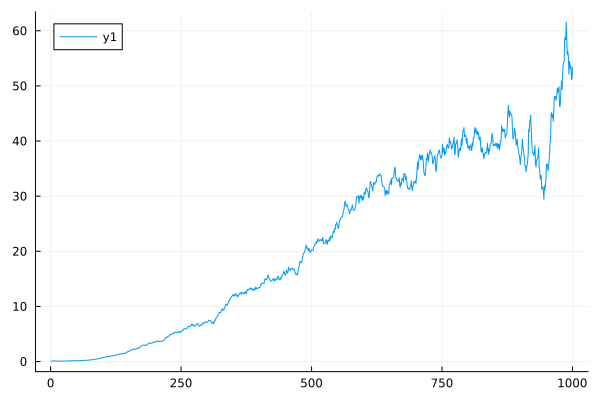

In [18]:
plot(m.enSP)

In [60]:
#Find minimum

# F.U
# F.U * dev(cat(Diagonal(F.S), (zeros(hparams.nv-hparams.nh,hparams.nh)),dims=1)) * F.Vt

In [53]:
F = LinearAlgebra.svd(J.w, full=true);
a0 = transpose(F.U) * J.a |> cpu
b0 = F.Vt * J.b  |> cpu ;
λ = F.S |> cpu ;

In [54]:
# F = LinearAlgebra.svd(J.w, full=false);
# a0 = transpose(F.U) * J.a |> cpu
# b0 = F.Vt * J.b  |> cpu ;
# λ = F.S |> cpu ;
# a0 .* b0 ./ (λ .+ 1.e-10)

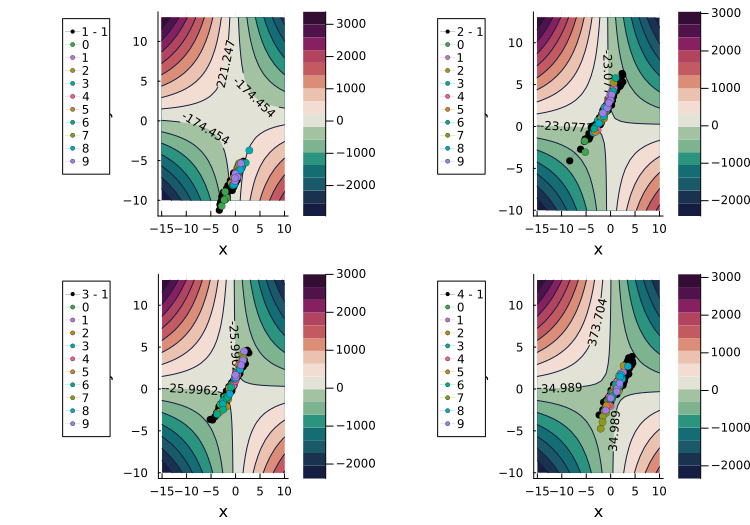

In [41]:
# plot(sort(a0 .* b0 ./ (λ .+ 1.e-10)))
plotLandscapes(rbm, J, 10 ; τ=1, kmax=4, TS, dev, hparams)

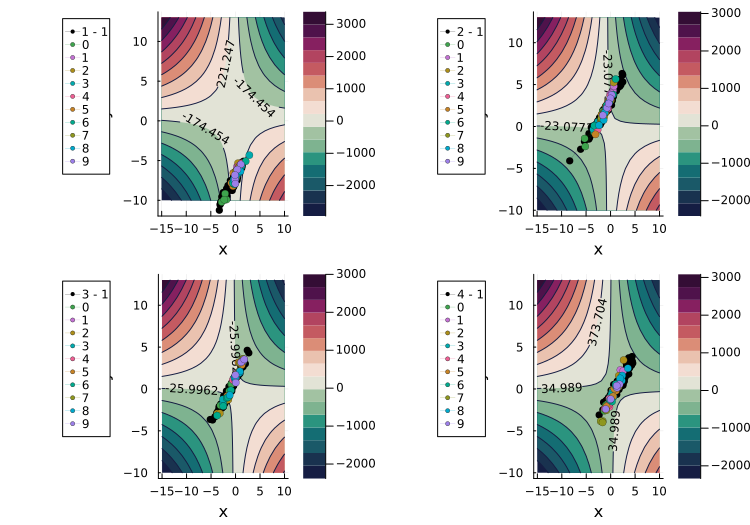

In [37]:
num=100
β=1
xh = sign.(rand(hparams.nh, num) .< 0.5) |> dev
rbm.v = Array{Float32}(sign.(rand(hparams.nv, num) |> dev .< σ.(β .* (J.w * xh .+ J.a)))) |> dev
for t in 1:500
    rbm.h = Array{Float32}(sign.(rand(hparams.nh, num) |> dev .< σ.(β .* (J.w' * rbm.v .+ J.b)))) |> dev ;
    rbm.v = Array{Float32}(sign.(rand(hparams.nv, num) |> dev .< σ.(β .* (J.w * rbm.h .+ J.a)))) |> dev  ;
end
plotLandscapes(rbm, J, 10 ; τ=1, TS, dev, hparams)

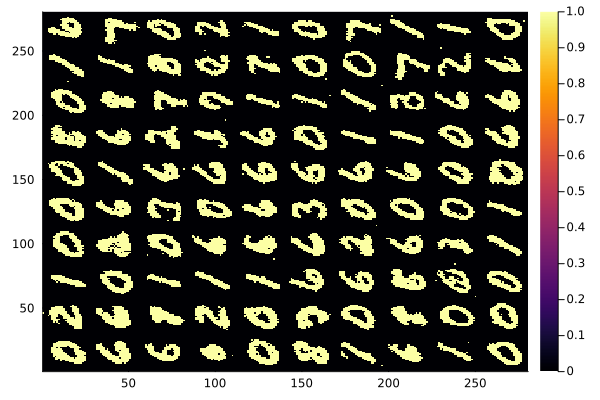

In [38]:
lnum = 10
hmp = rbm.v |> cpu
samp = reshape(hcat(hmp...), 28,28,:)
avSamp = cat([cat([samp[:,:,i+j*lnum] for i in 1:lnum]..., dims=2) for j in 0:lnum-1]...,dims=1)
hmSamp = heatmap(avSamp)

In [31]:
# heatmap(reshape(x[:,1],28,28))

In [ ]:
# 1 Init in rand state
# 2 MCMC for n steps
# 3 SVD and project to Gaussian spins
# 4 Rotate spins toward min
# 5 Project back to discrete spins

In [187]:
x0L = zeros(28*28)
y0L = zeros(500)
for dx in -5.0:0.1:-1.0
    x0, y0 = sampleGSpins(5.92, dx, J, rbm)
    x0L = hcat(x0L, x0)
    y0L = hcat(y0L, y0)
end
x0L = x0L[:,2:end]
y0L = y0L[:,2:end];

In [188]:
# x0L

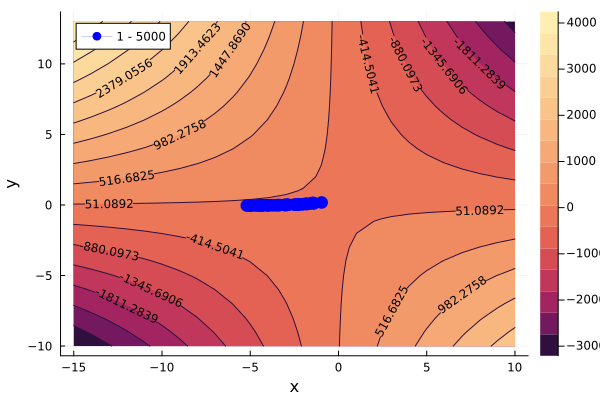

In [189]:
idx = 3
plotLandscape(x0L, y0L, 1,5000)

In [190]:
# s = cpu(F.U' * rbm.v)
# t = cpu(F.Vt * rbm.h);

v = cpu(F.U * dev(x0L));
# v = cpu((sign.(v) .+ 1)/2);
# v = cpu(σ.(v) .> 0.5);
# v = F.U * dev(reshape(x0,:,1))

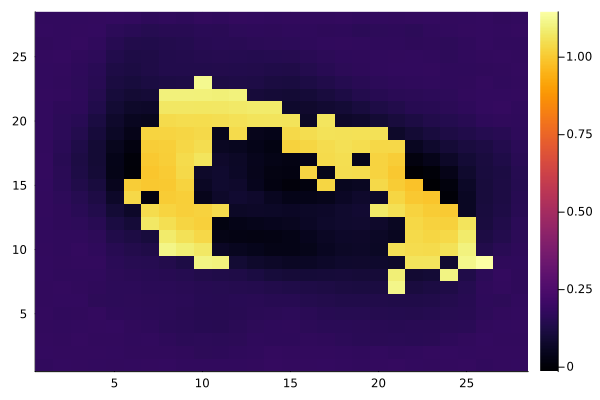

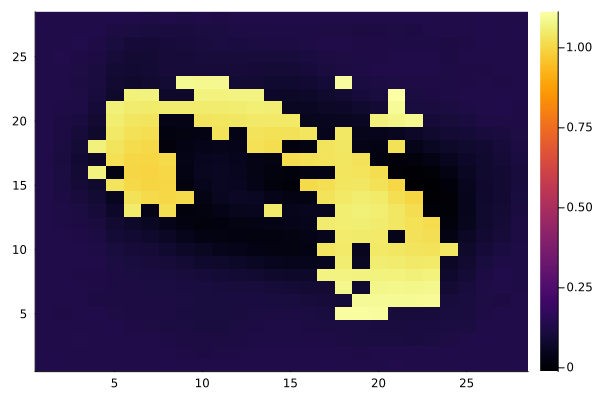

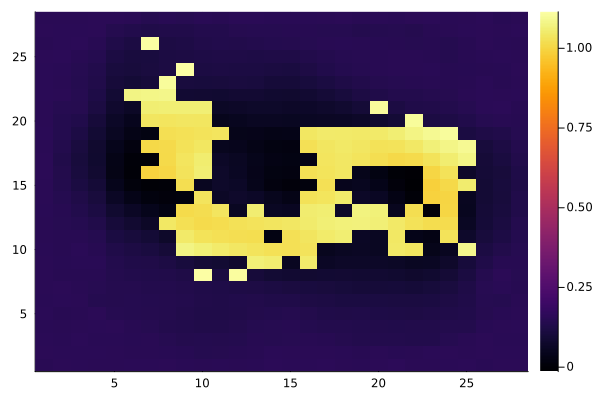

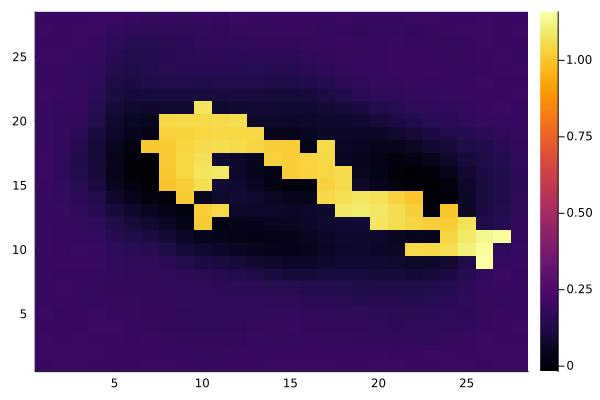

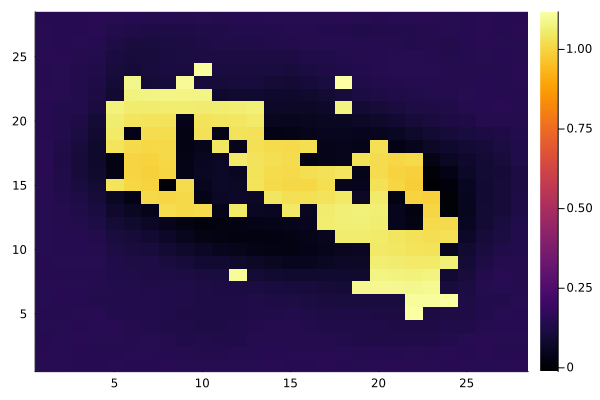

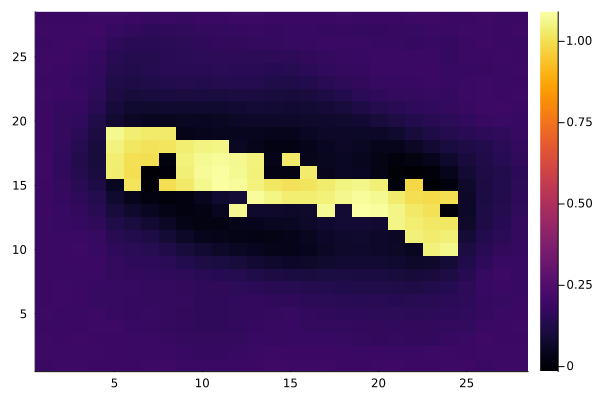

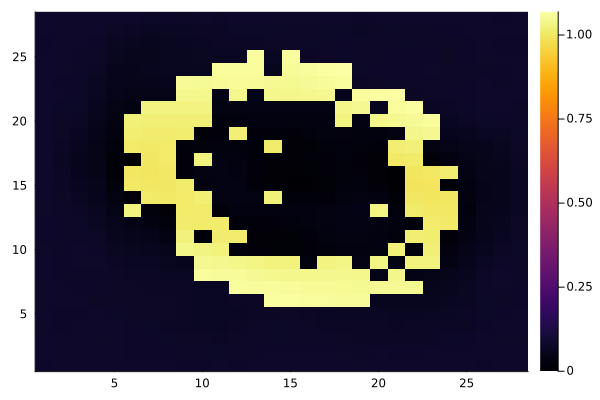

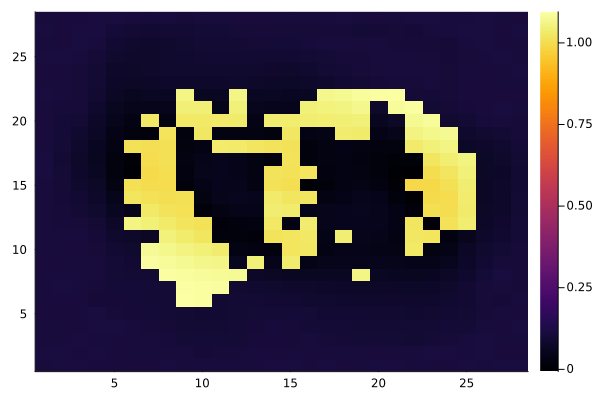

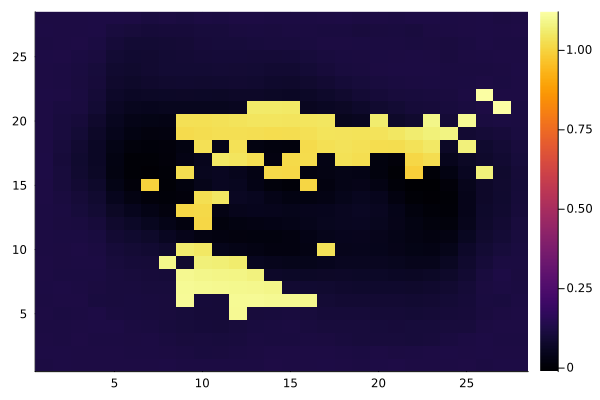

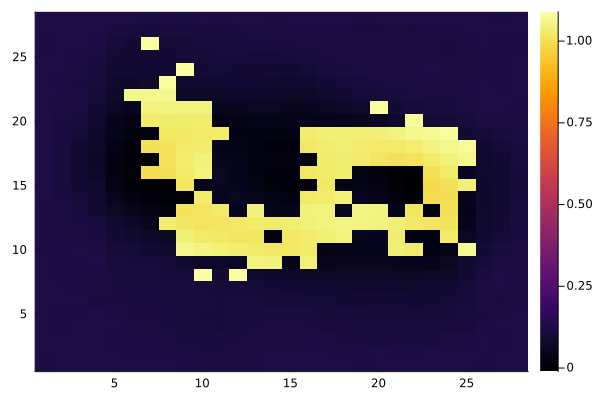

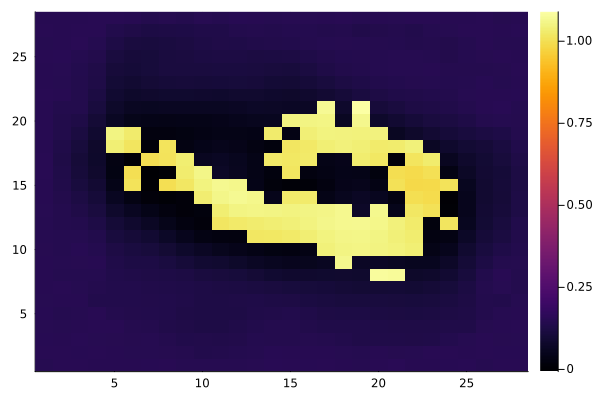

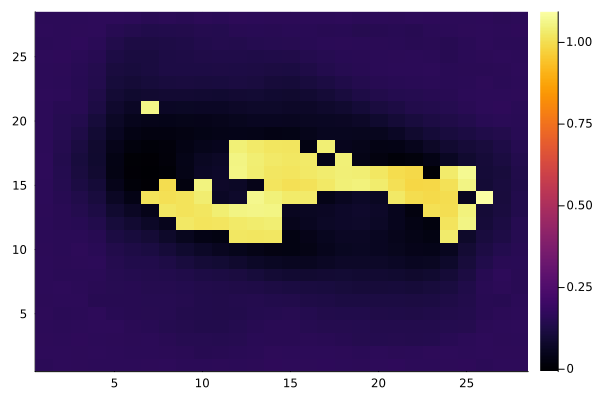

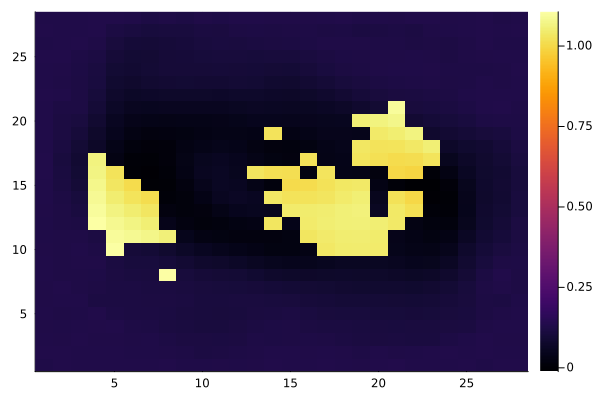

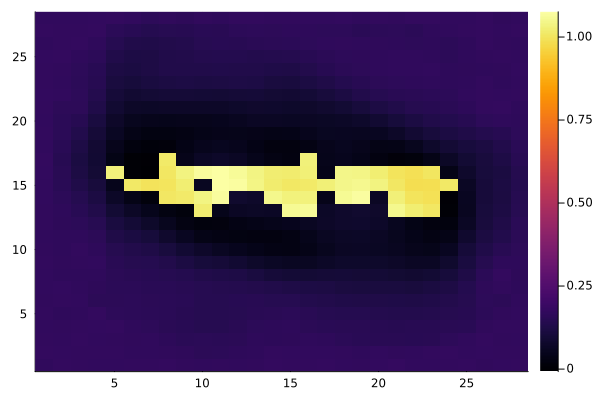

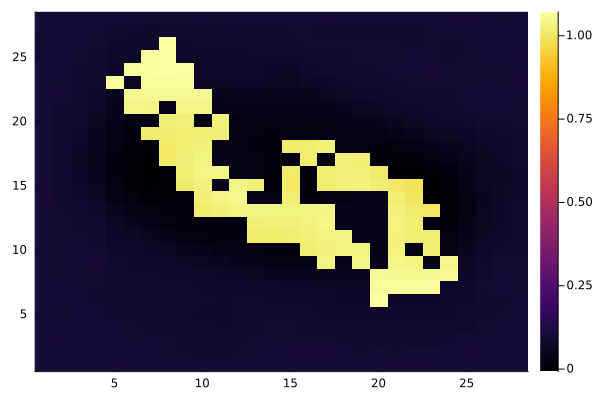

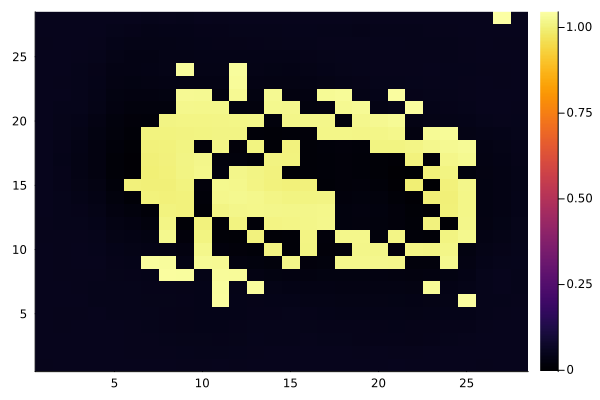

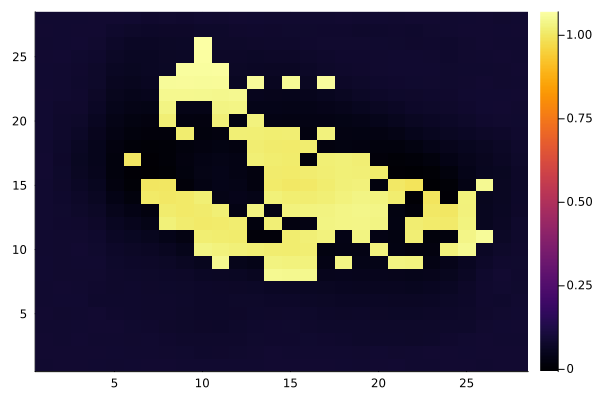

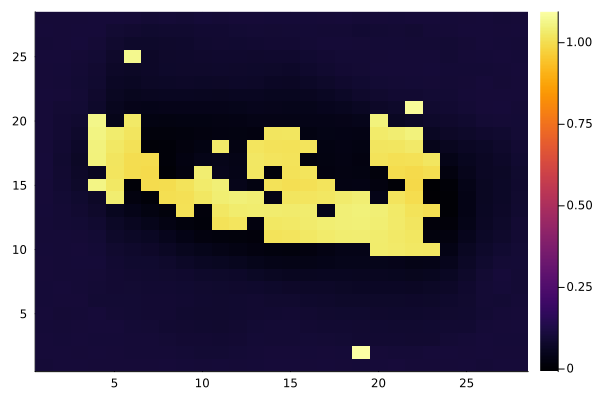

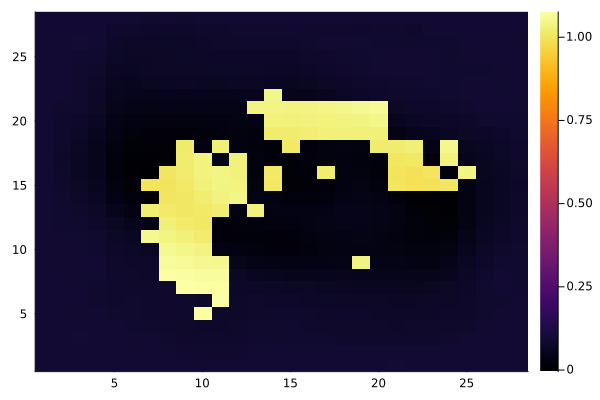

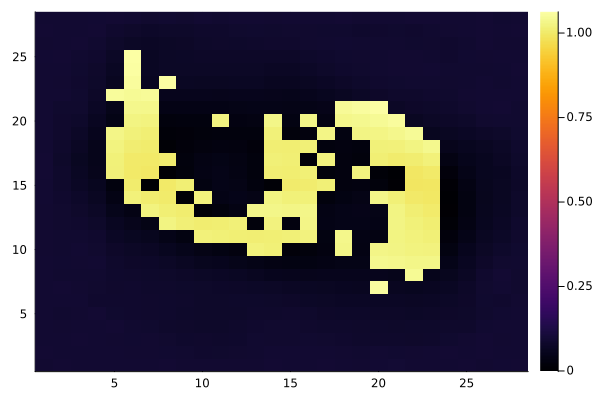

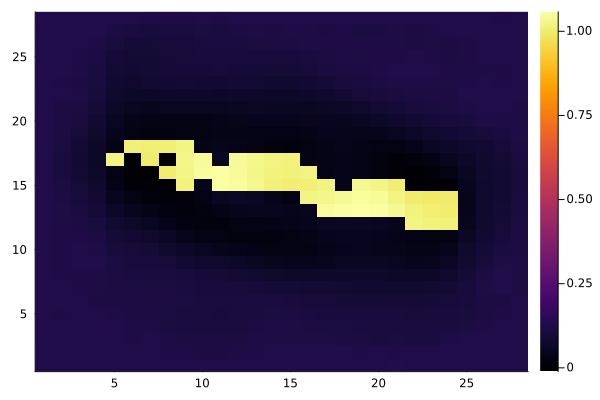

In [191]:
for i in 1:21
    fig = heatmap(reshape(v[:,i],28,28))
    display(fig)
end

In [125]:
# heatmap(cpu(reshape(rbm.v[:,1], 28,28)))
s

784×100 Matrix{Float32}:
 -0.503651     -1.39726     …  -2.26582    -1.15742     -2.4278
  0.394148     -1.39746         3.94639     1.95037      1.34478
 -0.125334     -2.47933        -3.40741    -1.15473      0.556363
 -0.596936     -2.3073          1.91365     0.410502     4.67169
  0.345438      0.806324        1.30234    -0.223044     0.735772
  0.993354      2.20538     …  -0.0934732   0.10427      1.9801
  0.636136     -2.95779        -0.197158   -2.3468      -0.826039
 -1.43445       0.528354        2.36614    -0.12648      2.50331
 -1.34129      -0.230991       -1.70677    -2.64551     -3.05857
  0.79907      -1.20778        -1.73209    -0.811918    -2.00222
  0.838124      1.28716     …   0.27557     0.793497     1.44357
 -0.660786      0.637662       -1.52306    -1.08376      0.266208
  0.826707      0.00562353     -1.58508    -0.75046      0.989241
  ⋮                         ⋱                           
  0.13149      -0.207746        0.206561   -0.0545586    0.102426
  0.